In [29]:
import os
from typing import List
import pandas as pd
import matplotlib.pyplot as plt
from enum import Enum
from scipy.stats import kstest
import numpy as np
import scipy.stats as st
from scipy.stats import levene

In [7]:
class HistoricalPeriods(Enum):
    early_predynastic = 1,
    late_predynastic = 2

In [8]:
# extraccion de datos segun la muestra
def sample_data(period:HistoricalPeriods) -> list[int]:
    try:
        fullpath = os.path.abspath(os.path.join('..','Statement', 'datosejercicioevaluacionanchuras.xlsx'))
        df = pd.read_excel(fullpath)
    except FileNotFoundError:
        print("Error: File datosejercicioevaluacionanchuras not found.")
        return [] 

    filas_filtradas = df[df["Época histórica"] == period.value] 

    data_list = filas_filtradas["Anchura del cráneo"].tolist() 

    return data_list

In [9]:
# calculo de medidas estadisticas
def show_statitics_measures(data: List[int]):
    df = pd.DataFrame({'valores': data})
    media = df['valores'].mean()
    mediana = df['valores'].median()
    moda = df['valores'].mode().iat[0]
    varianza = df['valores'].var()
    desviacion_estandar = df['valores'].std()
    asimetria = df['valores'].skew()
    curtosis = df['valores'].kurt()

    print('Media:', media)
    print('Mediana:', mediana)
    print('Moda:', moda)
    print('Varianza:', varianza)
    print('Desviación estándar:', desviacion_estandar)
    print('Asimetría (coeficiente de asimetría de fisher):', asimetria)
    print('Curtosis:', curtosis)

In [10]:
# diagrama de caja de bigotes para un conjunto de datos dados
def box_diagram(data : List[int], title: str):
    plt.boxplot(data)
    plt.title(title)
    plt.ylabel("Valores")
    plt.show()

In [11]:
def kolmogorov_smirnov_test(data: List[int], significante_level: float):
    data_serie = pd.Series(data)
    df = pd.DataFrame({'valores': data})

    statistic, p_value = kstest(data_serie, 'norm', args= ( df['valores'].mean(), df['valores'].std()))

    print("Estadístico KS:", statistic)
    print("Valor p:", p_value)

    if p_value > significante_level:
        print("La muestra sigue una distribución normal (no se rechaza la hipótesis nula)")
    else:
        print("La muestra no sigue una distribución normal (se rechaza la hipótesis nula)")

In [26]:
def intervalo_confianza_diff_medias(muestra1, muestra2, nivel_significancia):
    n1 = len(muestra1)
    n2 = len(muestra2)
    media1 = np.mean(muestra1)
    media2 = np.mean(muestra2)
    varianza1 = np.var(muestra1, ddof=1)  # ddof=1 para usar la varianza muestral
    varianza2 = np.var(muestra2, ddof=1)

    gl = n1 + n2 - 2  # Grados de libertad

    t_critico = st.t.ppf(1 - nivel_significancia/2, gl)  # Valor crítico de la distribución t
    error_estandar = np.sqrt(varianza1/n1 + varianza2/n2)
    margen_error = t_critico * error_estandar
    limite_inferior = (media1 - media2) - margen_error
    limite_superior = (media1 - media2) + margen_error
 

    return (limite_inferior, limite_superior)

In [30]:
def levene_test(sample1: List[int], sample2: List[int], significance_level:float):
    statistic, p_value = levene(sample1, sample2)

    print("Estadístico de Levene:", statistic)
    print("Valor p:", p_value)

    if p_value > significance_level:
        print("No se rechaza la hipótesis nula: las varianzas son iguales.")
    else:
        print("Se rechaza la hipótesis nula: las varianzas no son iguales.")

In [32]:
def t_student_test(sample1: List[int], sample2: List[int], significance_level:float):
    t_statistic, p_value = st.ttest_ind(sample1, sample2)
    
    print("Estadístico t:", t_statistic)
    print("Valor p:", p_value)

    if p_value < significance_level:
        print("Se rechaza la hipótesis nula: las medias son diferentes.")
    else:
        print("No se rechaza la hipótesis nula: no hay evidencia suficiente para decir que las medias son diferentes.")


<h1>Ej 1A - Análisis Estadístico de las muestras </h1>
<h2> Predinástico Temprano </h2>
<p> A continuación se muestran los estadísticos de la muestra de las longitudes en anchura (en mm) de los craneos egipcios para el periodo predinastico temprano</p>

Media: 131.53333333333333
Mediana: 131.5
Moda: 131
Varianza: 0.671264367816092
Desviación estándar: 0.8193072487266861
Asimetría (coeficiente de asimetría de fisher): 0.6920791207381011
Curtosis: 1.7812575396080788


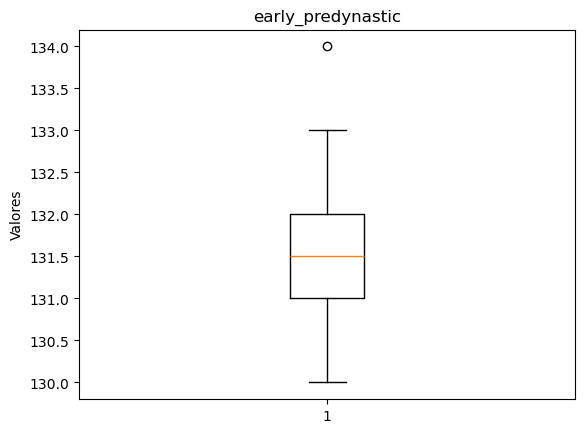

In [13]:
data = sample_data(HistoricalPeriods.early_predynastic)

show_statitics_measures(data)

box_diagram(data, HistoricalPeriods.early_predynastic.name)

<h3>Análisis de los datos</h3>

<p> Al estar la media y la mediana tan proximas podemos inferir que es una distribucion bastante simetrica, esa suposición nos la confirma el coeficiente de asimetria de fisher el cual muestra una asimetría positiva pero con un valor bastante cercano al 0 por lo que es cercana a una simetria perfecta. La varianza es tambien baja con respecto a el valor de las observaciones por lo que evidentemente podemos asumir que los valores se encuentran muy concentrados entornos a la media aunque ligeramente hacia la derecha debido a el coefienciente de asimetria  </p>

<p> Todas estas observaciones las podemos ver confirmadas con el diagrama de cajas. El primer y segundo cuartil se encuentras dispuestos simetricamente entorno a la media. Vemos un outlier a la derecha de la muestra que puede inflenciar en las deducciones de asimetria positiva que nos hacia inferir el coeficiente de asimetria de Fisher, lo cual confirma nuestra hipotesis de que es una muestra bastante simetrica con datos muy concentrados a ambos lados de la media, esta ultima afirmacion la podemos sustentar (ademas de que la varianza es pequeña para las dimensiones observadas) en la curtosis positiva y bastanta grande, lo que indica que la curva de la distribucion es bastante escarpada</p>

<h2>Predinástico Tardío</h2>

<p> A continuación se muestran los estadísticos de la muestra de las longitudes en anchura (en mm) de los craneos egipcios para el periodo predinastico temprano</p>

Media: 132.46666666666667
Mediana: 133.0
Moda: 133
Varianza: 1.0160919540229887
Desviación estándar: 1.0080138659874618
Asimetría (coeficiente de asimetría de fisher): 0.20552810308859776
Curtosis: 0.008694393176689186


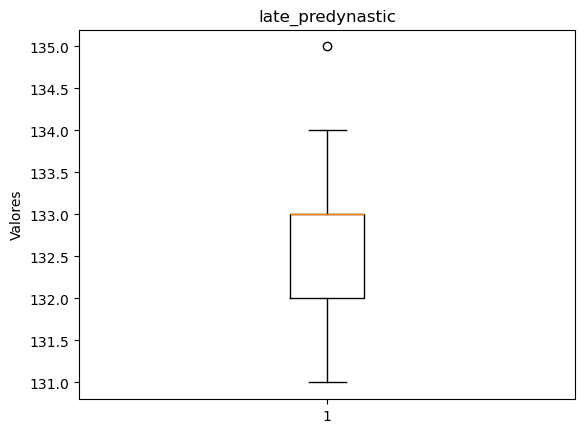

In [14]:
data = sample_data(HistoricalPeriods.late_predynastic)

show_statitics_measures(data)

box_diagram(data, HistoricalPeriods.late_predynastic.name)

<h3> Análisis de los datos </h3>



La mediana y la moda son iguales y ambas muy cercanas a la media por lo que podemos inferir de partida que los datos se corresponden a una distribucion bastante simetrica. La varianza es baja aunque ligermenta superior a la muestra anterior por lo que podemos suponer que los datos se encuentran concentrados alrededor de la media pero algo mas dispersos que la muestra anterior, esta afirmacion la podemos sustentar tambien en que la curtosis es apenas positiva, lo que sugiere que corresponden a una curva algo achatada.

El diagrama de cajas nos muestra una tremenda concentracion de datos entorno a la media con el segundo cuartil concentradisimo en la media y con una dispersion de datos baja, de hecho los bigotes no son muy extensos lo que indica que los valores extremos tampoco estan tan lejos de la media. Hay un outlier a la derecha, algo muy parecido a lo que paso en la muestra anterior.

En resumen: una distribución bastante simétrica, con baja dispersión y pocos valores atípicos. La mayoría de los datos se concentran alrededor de la media, y la forma general de la distribución se asemeja a la de una distribución normal.

<h2> Ej 1B - Test de Kolmogorov-Smirnov</h2>

Vamos determinar si las muestras analizadas corresponden a una distribucion normal usando el test Kolmogorov-Smirnov. Usaremos un nivel de significancia de 0.05. Es decir vamos a procurarnos un 95% de certeza a el peso de nuestras afirmaciones sobre el test

<h3> Predinástico Temprano</hr>

In [15]:
data = sample_data(HistoricalPeriods.early_predynastic)

alpha = 0.05

kolmogorov_smirnov_test(data, alpha)

Estadístico KS: 0.24246269818372912
Valor p: 0.04886236777870734
La muestra no sigue una distribución normal (se rechaza la hipótesis nula)


<h3>Predinastico tardio<h3>

In [16]:
data = sample_data(HistoricalPeriods.late_predynastic)

alpha = 0.05

kolmogorov_smirnov_test(data, alpha)

Estadístico KS: 0.2349629518015396
Valor p: 0.061135306356961516
La muestra sigue una distribución normal (no se rechaza la hipótesis nula)


<h2>Ej 2A - Test de diferencia de medias</h2>

<p>A traves de este test vamos a extrer un intervalo de confanza con diferentes niveles de significancia  (Alpha = 0.01, 0.05, 0.10) para la difernecia de medias entre las dos muestras. Es decir vamos a calcular entre que valores deberia  estar el resultado entre las medias poblacionales de las respectivas muestras</p>


In [28]:
data_early_predynastic = sample_data(HistoricalPeriods.early_predynastic)
data_late_predynastic = sample_data(HistoricalPeriods.late_predynastic)

alpha1 = 0.01
alpha2 = 0.05
alpha3 = 0.10

(lim_inf1, lim_sup1) = intervalo_confianza_diff_medias(data_early_predynastic,data_late_predynastic,alpha1)
(lim_inf2, lim_sup2) = intervalo_confianza_diff_medias(data_early_predynastic,data_late_predynastic,alpha2)
(lim_inf3, lim_sup3) = intervalo_confianza_diff_medias(data_early_predynastic,data_late_predynastic,alpha3)

print(f"Intervalo de confianza para alpha = {alpha1}: ({lim_inf1:.2f}, {lim_sup1:.2f})")
print(f"Intervalo de confianza para alpha = {alpha2}: ({lim_inf2:.2f}, {lim_sup2:.2f})")
print(f"Intervalo de confianza para alpha = {alpha3}: ({lim_inf3:.2f}, {lim_sup3:.2f})")


Intervalo de confianza para alpha = 0.01: (-1.56, -0.30)
Intervalo de confianza para alpha = 0.05: (-1.41, -0.46)
Intervalo de confianza para alpha = 0.1: (-1.33, -0.54)


<h3>Conclusion</h3>

<p>Debido a que el 0 no se encuentra en ningun interavalo de los obtenidos y apelando a el maximo nivel de confianza obtenido: podemos suponer hasta con un 99% de certeza que las medias de las poblaciones correspondientes a las dos muestras que contrastamos (predinástico tardío y predinástico temprano) son distintas y que la media del predinastico tardio es al menos 0.30mm y hasta 1.56mm superior a la media del predinastico temprano</p>

<h2>Ej 2B - Contrastar hipotesis de medias iguales con el test t</h2>

<p> Para poder utilizar el test t de Student de manera valida para probar la hipotesis de medias poblacionales iguales partiendo de dos muestras se deben tener en cuenta las siguientes condiciones</p>

<ul>
    <li><b>Las muestras deben ser aleatorias e independientes</b>: el enunciado nos dice claramente que demos por supuesta esta premisa</li>
    <li><b>Las poblaciones deben seguir una distribución normal</b>: en el ej 1b demostramos a partir del test Kolmogorov-Smirnov que la muestra del predinastico temprano no se corresponde con una distrubucion normal pero la del predinastico temprano si. Si bien es cierto que el test solo evalua la muestra y no la poblacion, no tenemos evidencia suficiente para decir que las poblaciones son normalemnte distribuidas y en cambio tenemos evidencia (al menos muestral) de que la muestra del predinastico tardio no esta normalmente distribuida</li>
    <li><b>Las varianzas de las poblaciones deben ser iguales (homocedasticidad)</b>: para probar esto hay un par de alternativas, la que utilizamos es el test de Levene, el cual (como se enuncia debajo) nos indica que no hay evidencia sufiente para rechazar nuestra hipotesis de que las varianzas poblacionales son iguales con un nivel de signicancia del 95%
    </li>
</ul>

In [31]:
data_early_predynastic = sample_data(HistoricalPeriods.early_predynastic)
data_late_predynastic = sample_data(HistoricalPeriods.late_predynastic)

levene_test(data_early_predynastic,data_late_predynastic, 0.05)

Estadístico de Levene: 0.6194926568758352
Valor p: 0.434440377333167
No se rechaza la hipótesis nula: las varianzas son iguales.


Por lo tanto al no cumplirse la segunda condicion no podemos dar como valido el test t de Student ya que nos podria dar resultados incorrectos. De todas maneras se nos solicita en la ejercitación que sin importar que las condiciones se cumplan o no debemos realizar las pruebas por lo que las hare de todas maneras.

In [33]:
data_early_predynastic = sample_data(HistoricalPeriods.early_predynastic)
data_late_predynastic = sample_data(HistoricalPeriods.late_predynastic)

t_student_test(data_early_predynastic,data_late_predynastic, 0.05)

Estadístico t: -3.93544640665054
Valor p: 0.00022478132957178793
Se rechaza la hipótesis nula: las medias son diferentes.


El test t de student nos indica que hay evidencia suficiente ,para el nivel de significancia del 95, de que las medias no son iguales. Sin embargo es importante repetir que la prueba de t de student no debe ser tomada como valida para estas muestras ya que la muestra del predinastico temprano es una muestra que no esta normalmente distribuida segun los resultados que obtuvimos del test Kolmogorov-Smirnov